<a href="https://colab.research.google.com/github/IshantWadhwa4/COVID-19-EDA/blob/master/covid19_Classification_by_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
# world data of confirmed cases
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_confirmed = pd.read_csv(url_confirmed)
data_confirmed['Province/State'].fillna(data_confirmed['Country/Region'],inplace = True)

In [28]:
data_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
2,Algeria,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847
6,Argentina,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,4,6,9,19,32,39,39,53,62,71,77,78,80,84
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,13,22,22,26,28,38,48,55,65,65,92,112,134,171,210,267,307,353,436,669,669,818,1029,1219,1405,1617,1791,2032,2032,2182
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,5,5,6,6,12,12,15,15,15,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2
246,Yukon,Canada,64.2823,-135.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,4,4,4,5,5
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,3


In [0]:
# world data of death cases
url_Deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
data_death = pd.read_csv(url_Deaths)
data_death['Province/State'].fillna(data_death['Country/Region'],inplace = True)


In [0]:
# world data of Recovered cases
url_Recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
data_Recovered = pd.read_csv(url_Recovered)
data_Recovered['Province/State'].fillna(data_Recovered['Country/Region'],inplace = True)

### list of country having more than 800 cases



In [0]:
data_confirmed_number = data_confirmed.melt(id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="confirmed")

In [0]:
data_500 = data_confirmed_number[data_confirmed_number['confirmed'] >  800]

In [0]:
country = list(set(data_500['Country/Region']))

#### Get data for above countries

In [0]:
data_confirmed = data_confirmed[data_confirmed['Country/Region'].isin(country)]

In [0]:
confirmed_cases = data_confirmed.drop(["Province/State","Lat","Long"],axis=1)

In [0]:
confirmed_cases = confirmed_cases.groupby('Country/Region').sum()

In [0]:
confirmed_cases_country = confirmed_cases.index.tolist()

In [0]:
confirmed_cases = confirmed_cases.values

#### prepare Data

In [0]:
from sklearn.preprocessing import normalize # to rescale the data
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [0]:
normalize_confirmed_cases = normalize(confirmed_cases)

In [15]:
normalize_confirmed_cases

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.58822625e-01, 4.39926370e-01, 5.20415691e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.64698579e-01, 4.68771101e-01, 4.68771101e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.84694487e-01, 4.02160551e-01, 4.28888923e-01],
       ...,
       [2.42047519e-06, 2.42047519e-06, 4.84095039e-06, ...,
        3.91649830e-01, 4.55465658e-01, 5.16461633e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.73188038e-01, 4.05559505e-01, 4.97176863e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.85204377e-01, 4.37152841e-01, 5.12364884e-01]])

In [0]:
mergings = linkage(normalize_confirmed_cases, method='complete')

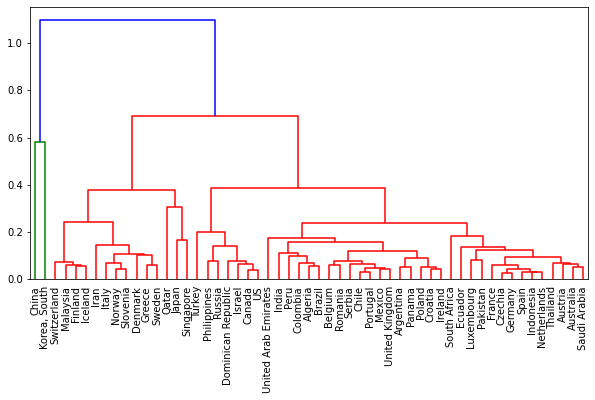

In [17]:
# the first line is written for you - it sets the size of your plot
plt.figure(figsize=(10, 5))

dendrogram(
    mergings,
    labels=confirmed_cases_country,
    leaf_rotation=90.,
    leaf_font_size=10
)
plt.show()

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
model = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')
model.fit(normalize_confirmed_cases)
labels = model.labels_

In [20]:
len(labels)

55

In [0]:
country_classification = pd.DataFrame(confirmed_cases)

In [0]:
country_classification.columns = data_confirmed.columns[4:] 

In [0]:
country_classification['Country'] = confirmed_cases_country
country_classification['labels'] = labels

In [0]:


country_classification['Total_cases'] = country_classification['4/1/20']

In [0]:


import seaborn as sns
% matplotlib inline



In [31]:
import plotly.express as px
fig = px.histogram(country_classification, x="Country", color="labels",y="Total_cases",histfunc='max')
fig.show()

In [32]:
country_classification

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,Country,labels,Total_cases
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,Algeria,0,847
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,Argentina,0,1054
2,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,30,39,52,55,60,63,76,91,107,128,128,200,250,297,377,452,568,681,791,1071,1549,1682,2044,2364,2810,3143,3640,3984,4361,4559,4862,Australia,0,4862
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,3,9,14,18,21,29,41,55,79,104,131,182,246,302,504,655,860,1018,1332,1646,2013,2388,2814,3582,4474,5283,5588,6909,7657,8271,8788,9618,10180,10711,Austria,0,10711
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,8,13,23,50,109,169,200,239,267,314,314,559,689,886,1058,1243,1486,1795,2257,2815,3401,3743,4269,4937,6235,7284,9134,10836,11899,12775,13964,Belgium,0,13964
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,4,4,13,13,20,25,31,38,52,151,151,162,200,321,372,621,793,1021,1546,1924,2247,2554,2985,3417,3904,4256,4579,5717,6836,Brazil,0,6836
6,0,0,0,0,1,1,2,2,2,4,4,4,4,4,5,5,7,7,7,7,7,7,7,7,7,7,8,8,8,8,9,9,9,10,11,11,13,14,20,24,27,30,33,37,49,54,64,77,79,108,117,193,198,252,415,478,657,800,943,1277,1469,2088,2790,3251,4042,4682,5576,6280,7398,8527,9560,Canada,1,9560
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,4,4,8,8,13,23,23,43,61,74,155,201,238,238,434,537,632,746,922,1142,1306,1610,1909,2139,2449,2738,3031,Chile,0,3031
8,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,80136,80261,80386,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305,81435,81498,81591,81661,81782,81897,81999,82122,82198,82279,82361,China,7,82361
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,9,9,13,22,34,54,65,93,102,128,196,231,277,378,470,491,539,608,702,798,906,1065,Colombia,0,1065
